In [6]:
import matplotlib.pyplot as plt

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import openturns as ot

import otagrum as otagr

from utils import learn,timer

In [7]:
import matplotlib.pyplot as plt
import numpy as np


In [8]:
sizes=[1000,2000,3000,5000,10000,15000,20000,35000,50000]
nbr=40
correlations=[i/nbr for i in range(0,nbr)]
conds=ot.Indices()

def getBiNormal(size,correl):
  R=ot.CorrelationMatrix(2)
  R[(0,1)]=correl
    
  mean=ot.Point(2, 2.0)
  sigma=ot.Point(2, 3.0)
  distribution=ot.Normal(mean, sigma, R)

  return distribution.getSample(size)

resttest={}
respvalue={}
restime=[]
for size in sizes:
    resttest[size]=list()
    respvalue[size]=list()
    with timer("Size[{}]".format(size)) as t:
        for corr in correlations:
            (ttest,pvalue,isindep)=otagr.ContinuousTTest(getBiNormal(size,corr)).isIndep(0,1,conds)
            resttest[size].append(ttest)
            respvalue[size].append(pvalue)
    restime.append(t.getDuration()/len(correlations))

+ Size[1000] done in 00.352s
+ Size[2000] done in 00.938s
+ Size[3000] done in 01.896s
+ Size[5000] done in 04.908s
+ Size[10000] done in 18.727s
+ Size[15000] done in 41.445s
+ Size[20000] done in 01:13.316s
+ Size[35000] done in 03:42.586s
+ Size[50000] done in 07:35.370s


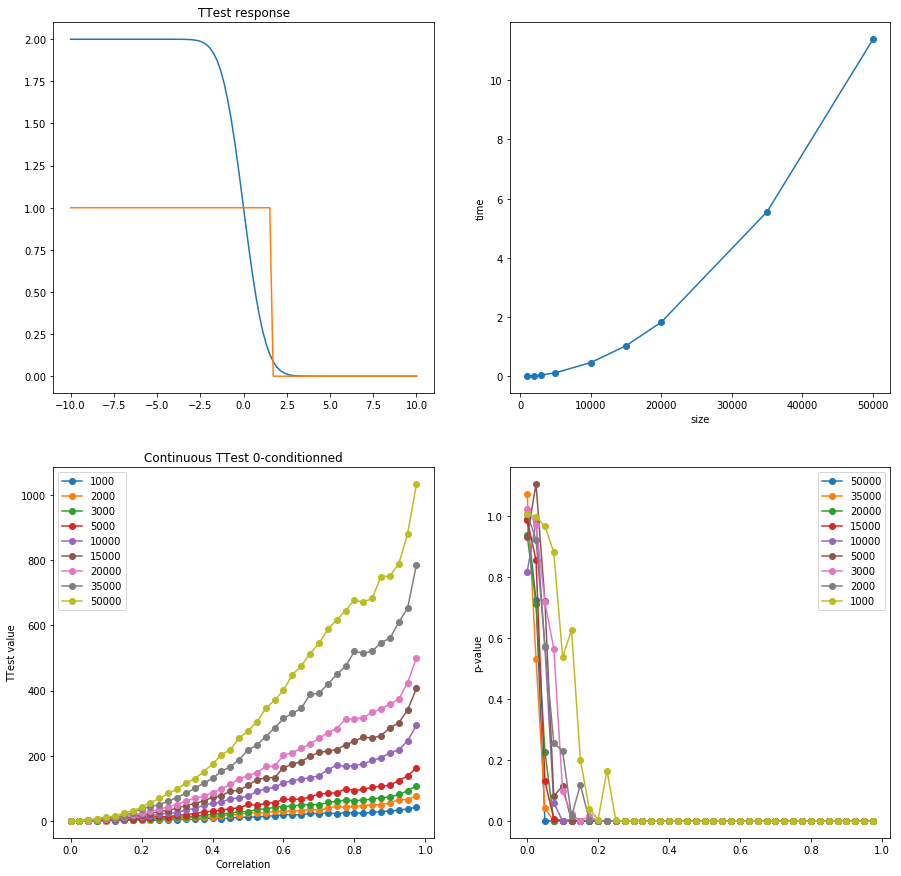

In [9]:
plt.figure(figsize=(15,15))
plt.subplot(2,2, 3)
for size in sizes:
    plt.plot(correlations,resttest[size], 'o-',label=str(size))
plt.title('Continuous TTest 0-conditionned')
plt.ylabel('TTest value')
plt.xlabel('Correlation')
plt.legend()

plt.subplot(2 ,2, 4)
for size in sizes[::-1]:
    plt.plot(correlations,respvalue[size], 'o-',label=str(size))
plt.ylabel('p-value')
plt.legend()

plt.subplot(2 ,2, 2)
plt.plot(sizes,restime, 'o-')
plt.ylabel('time')
plt.xlabel('size')


plt.subplot(2 ,2, 1)
x=np.linspace(-10,10,100)
plt.plot(x,[otagr.ContinuousTTest.isIndepFromTest(x,0.1)[1:3] for x in x])
plt.title("TTest response")
plt.savefig("ContinuousTest_by_correlation.pdf")
plt.show()        

In [5]:
from time import time 
import math

def updateStats(x,v):
    x['mean']+=v
    x['stdev']+=v*v
    if x['min']>v:
        x['min']=v
    if x['max']<v:
        x['max']=v

conds=ot.Indices()

def finalizeStats(x,epoch):
    x['mean']/=epoch
    x['stdev']=math.sqrt(x['stdev']/epoch-x['mean']*x['mean'])

def statsFor(nbrVar,nbr,epoch=20):
    print("=====",nbr,"=====")

    stats_v={'mean':0.0,'stdev':0.0,'min':1000000.0,'max':0.0}
    stats_t={'mean':0.0,'stdev':0.0,'min':1000000.0,'max':0.0}

    for i in range(epoch):
        data=ot.IndependentCopula(5).getSample(nbr)
        t0 = time()
        minval=100
        for y in range(nbrVar):
            for z in range(y+1,nbrVar):
                (ttest,pvalue,isindep)=otagr.ContinuousTTest(data).isIndep(y,z,conds)
                if pvalue*100<minval:
                    minval=pvalue*100
        t1=time()
        if minval==0:
            break
        else:
            #mean
            updateStats(stats_v,minval)
            updateStats(stats_t,t1-t0)

    finalizeStats(stats_v,epoch)
    finalizeStats(stats_t,epoch)

    #print("v:",stats_v)
    #print("t:",stats_t)
    return stats_v,stats_t

nbrVar=5
sampleStart=100
sampleStop=10000
sampleStep=300

x=[]
vy=[]
vy1=[]
vy2=[]
vyerr_min=[]
vyerr_max=[]
ty=[]
tyerr_min=[]
tyerr_max=[]
for nbr in range(sampleStart,sampleStop,sampleStep):
    v,t=statsFor(nbrVar,nbr)
    if v['mean']==0:
        #print("Valeur nulle")
        continue
    x.append(nbr)
    vy.append(v['mean'])
    vyerr_min.append(v['mean']-v['min'])
    vyerr_max.append(v['max']-v['mean'])
    vy1.append(v['mean']-2*v['stdev'])
    vy2.append(v['mean']+2*v['stdev'])
    ty.append(t['mean'])
    tyerr_min.append(t['mean']-t['min'])
    tyerr_max.append(t['max']-t['mean'])
 

===== 100 =====


NameError: name 'otagr' is not defined

NameError: name 'x' is not defined

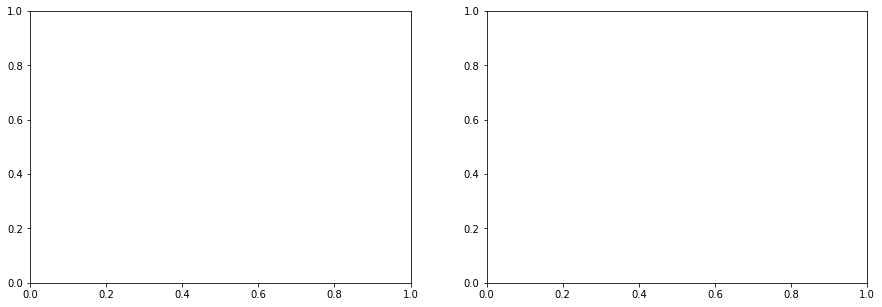

In [4]:
fig, (ax0, ax1) = plt.subplots(ncols=2, sharex=True,figsize=(15,5))
ax0.fill_between(x,vy1,vy2,facecolor='yellow',alpha=0.5)
ax0.errorbar(x, vy, yerr= [vyerr_min,vyerr_max])
ax0.set_title("Seuil en fonction de la taille")
ax0.grid()
ax1.errorbar(x, ty, yerr= [tyerr_min,tyerr_max])
ax1.set_title("Temps de calcul en fonction de la taille")
ax1.grid()
plt.show()
#fig.savefig('seuilIndep.pdf', dpi=100)

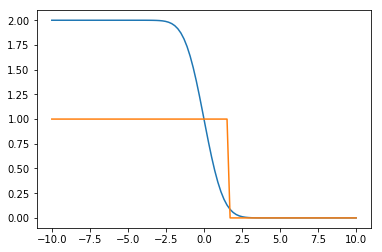

In [11]:

xs=np.linspace(-10,10,100)
plt.plot(x,[otagr.ContinuousTTest.isIndepFromTest(x,0.1)[1:3] for x in xs])

In [12]:
otagr.ContinuousTTest.isIndepFromTest(1,0.1)

(1.0, 0.31731050786291404, True)